In [1]:
from sklearn.datasets import *
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

In [71]:
n_pts = 25
x = np.arange(n_pts)
y = x + 2*np.ones(n_pts) + 10*2*(np.random.rand(n_pts)-1/2)

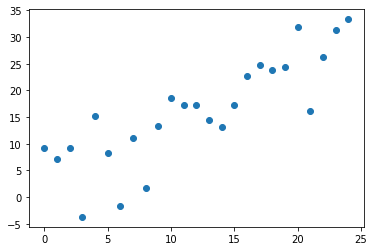

In [72]:
plt.scatter(x,y)

In [73]:
x = x.reshape(x.shape[0], 1)
reg = linear_model.LinearRegression()
reg.fit(x, y)
y_predicted = reg.predict(x)

In [74]:
print(reg.coef_)
print(reg.intercept_)

[1.11592894]
2.688610669894331


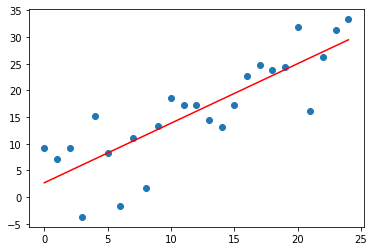

In [75]:
plt.scatter(x,y)
plt.plot(x, reg.coef_*x + reg.intercept_, 'r')

In [77]:
a = np.arange(10)
b = np.arange(10)
aa, bb = np.meshgrid(a, b)
z = 5*aa + 8*bb + 2*(np.random.rand()-0.5) + 3

In [78]:
aa = aa.flatten()
aa = aa.reshape(aa.shape[0], 1)
bb = bb.flatten()
bb = bb.reshape(bb.shape[0], 1)
z = z.flatten()
z = z.reshape(z.shape[0], 1)
x = np.append(aa,bb, axis=1)
z.shape


(100, 1)

In [79]:
reg = linear_model.LinearRegression()
reg.fit(x, z)
z_predicted = reg.predict(x)

In [80]:
print(reg.coef_)
print(reg.intercept_)

[[5. 8.]]
[2.96618167]


In [9]:
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [10]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['Prices'] = boston.target

print(bos.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Prices  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  


In [11]:
reg = linear_model.LinearRegression()
#reg.fit(bos[['CRIM', 'INDUS', 'TAX']], bos['Prices'])
reg.fit(bos[['CRIM']], bos['Prices'])
prices = reg.predict(bos[['CRIM']])
reg.fit(bos[boston.feature_names], bos['Prices'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print(reg.coef_)
print(reg.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.459488385089855


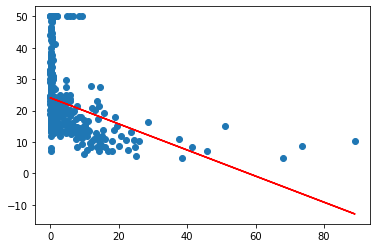

In [14]:
plt.scatter(bos['CRIM'], bos['Prices'])
plt.plot(bos['CRIM'], prices, color='r')
plt.show()